In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

In [2]:
# Function to create a dataset of a circle at a given point
def create_circle(c=np.array([0.0, 0.0]), r=1.0, noise=0.0, n=20):
    delta = 2.0*np.pi / n
    theta = np.linspace(0.0, 2.0*np.pi, num=n, endpoint=False)
    c = np.array(c)
    
    x = c[0] + r*np.cos(theta) + np.random.normal(scale=noise, size=theta.shape)
    y = c[1] + r*np.sin(theta) + np.random.normal(scale=noise, size=theta.shape)
    return np.array([x, y]).T

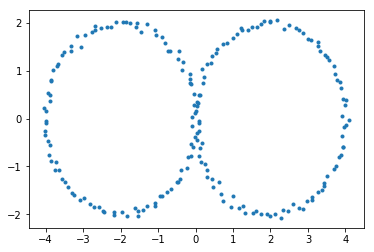

In [8]:
# Create and show two circles with some noise
circ1 = create_circle(c=[-2.0, 0.0], r=2.0, noise=0.05, n=100)
circ2 = create_circle(c=[2.0, 0.0], r=2.0, noise=0.05, n=100)
dataset = np.concatenate((circ1, circ2))
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [30]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
f_x = filt(dataset)
cover = pythd.cover.IntervalCover1D.EvenlySpacedFromValues(f_x, 10, 0.5)
clustering = pythd.clustering.HierarchicalClustering()

In [31]:
# Run MAPPER and get 1 skeleton
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)
nodes, edges = res.compute_1_skeleton()

In [32]:
# Create igraph graph
g = igraph.Graph()
for vid, points in nodes.items():
    g.add_vertex(name=str(vid), points=points)
g.add_edges(edges)
print(g)

IGRAPH UN-- 15 16 --
+ attr: name (v), points (v)
+ edges (vertex names):
0--1, 0--2, 1--13, 1--14, 2--3, 2--4, 3--5, 4--6, 5--7, 6--7, 7--8, 9--10,
9--12, 10--13, 11--14, 12--14


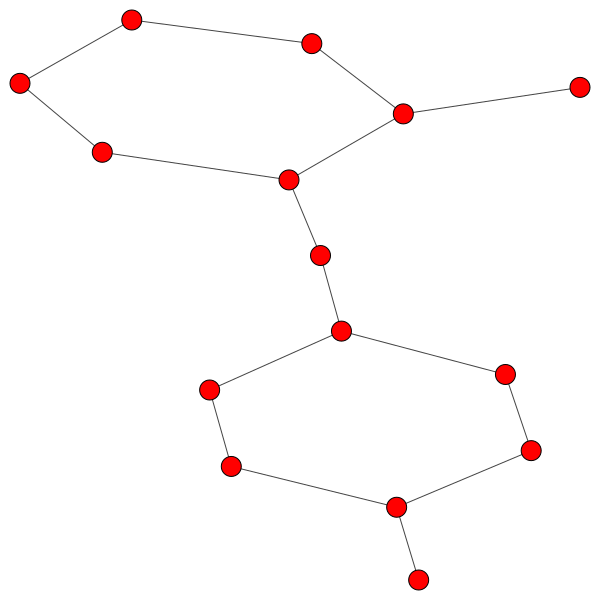

In [33]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)